<div style="display: flex; text-align:center; background-color: rgb(153,102,153);" >
<h1 style="margin: auto; padding: 30px; ">Produisez une étude de marché avec Python <br></h1>

# Scénario

La poule qui chante est une entreprise fr agroalimentaire qui souhaite se développer à l’international en exportant son poulet

Mes missions :

Réaliser une première analyse des groupements de pays potentiels les plus enclins au développement international

 <div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">1 - Importation des librairies et fichiers</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

In [2]:
pop = pd.read_csv("Population_2000_2018.csv")
dispo_ali = pd.read_csv("DisponibiliteAlimentaire_2017.csv")

# Affichage des nombres : séparateur des milliers, et réduction du nombre de décimales
pd.options.display.float_format = '{:,.2f}'.format

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">2 - Nettoyage </h2>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.1- Population </h3>

In [3]:
pop.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,"20,779.95",X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,"21,606.99",X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,"22,600.77",X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,"23,680.87",X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,"24,726.68",X,Sources internationales sûres,NaN


In [4]:
print(pop.shape)
print()
print(pop.dtypes)

(4411, 15)

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                       object
dtype: object


In [5]:
#Val manquantes :On va trier les colonnes après
pop.isna().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

In [6]:
#Regardons les doublons maintenant : 
pop.duplicated().sum()

0

In [7]:
print(pop['Zone'].nunique())
print()
print(pop['Élément'].unique())
print()
print(pop['Produit'].unique())
print()
print(pop['Année'].unique())
print()
print(pop['Unité'].unique())

238

['Population totale']

['Population-Estimations']

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]

['1000 personnes']


In [8]:
#Unité = pour 1000 personnes :
pop['Valeur'] = pop['Valeur']*10**3
pop.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,"20,779,953.00",X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,"21,606,988.00",X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,"22,600,770.00",X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,"23,680,871.00",X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,"24,726,684.00",X,Sources internationales sûres,NaN


In [9]:
#On va sélectionner seulement les variables utiles :
pop = pop[['Zone', 'Année', 'Valeur']]
pop.reset_index(inplace = True, drop = True)

#Renomme les colonnes
pop.columns=['zone', 'annee', 'population']
pop.head(3)

,zone,annee,population
0,Afghanistan,2000,"20,779,953.00"
1,Afghanistan,2001,"21,606,988.00"
2,Afghanistan,2002,"22,600,770.00"


In [10]:
#On pourra voir plus tard qu'il n'y a que des données de 2017 pour dispo_ali on va donc filter à cette même année
pop = pop.loc[pop['annee'] == 2017]

#Et sup colonne année 
del pop['annee']
pop

,zone,population
17,Afghanistan,"36,296,113.00"
36,Afrique du Sud,"57,009,756.00"
55,Albanie,"2,884,169.00"
74,Algérie,"41,389,189.00"
93,Allemagne,"82,658,409.00"
...,...,...
4333,Venezuela (République bolivarienne du),"29,402,484.00"
4352,Viet Nam,"94,600,648.00"
4371,Yémen,"27,834,819.00"
4390,Zambie,"16,853,599.00"


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.2- Dispo alimentaire </h3>

In [11]:
dispo_ali.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,"4,281.00",S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,"2,302.00",S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,"6,701.00",S,Données standardisées


In [12]:
print(dispo_ali.shape)
print()
print(dispo_ali.dtypes)

(176600, 14)

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
dtype: object


In [13]:
#Val manquantes :
dispo_ali.isna().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

In [14]:
#Regardons les doublons maintenant : 
dispo_ali.duplicated().sum()

0

In [15]:
#On regarde un peu les données
print(dispo_ali['Zone'].nunique())
print()
print(dispo_ali['Élément'].unique())
print()
print(dispo_ali['Produit'].unique())
print()
print(dispo_ali['Année'].unique())
print()
print(dispo_ali['Unité'].unique())

174

['Production' 'Importations - Quantité' 'Variation de stock'
 'Exportations - Quantité' 'Disponibilité intérieure'
 'Aliments pour animaux' 'Semences' 'Pertes' 'Résidus' 'Nourriture'
 'Disponibilité alimentaire en quantité (kg/personne/an)'
 'Disponibilité alimentaire (Kcal/personne/jour)'
 'Disponibilité de protéines en quantité (g/personne/jour)'
 'Disponibilité de matière grasse en quantité (g/personne/jour)'
 'Traitement' 'Autres utilisations (non alimentaire)'
 'Alimentation pour touristes']

['Blé et produits' 'Riz et produits' 'Orge et produits' 'Maïs et produits'
 'Seigle et produits' 'Avoine' 'Millet et produits' 'Sorgho et produits'
 'Céréales, Autres' 'Pommes de Terre et produits' 'Ignames' 'Racines nda'
 'Sucre, canne' 'Sucre, betterave' 'Sucre Eq Brut' 'Edulcorants Autres'
 'Miel' 'Haricots' 'Pois' 'Légumineuses Autres et produits'
 'Noix et produits' 'Soja' 'Arachides Decortiquees' 'Graines de tournesol'
 'Graines Colza/Moutarde' 'Graines de coton' 'Coco (Incl Coprah

In [16]:
#On va sélectionner seulement les variables utiles :
dispo_ali = dispo_ali[['Zone','Élément', 'Produit', 'Unité', 'Valeur']]

#Renomme les colonnes
dispo_ali.columns=['zone','element', 'produit', 'unite', 'valeur']
dispo_ali

,zone,element,produit,unite,valeur
0,Afghanistan,Production,Blé et produits,Milliers de tonnes,"4,281.00"
1,Afghanistan,Importations - Quantité,Blé et produits,Milliers de tonnes,"2,302.00"
2,Afghanistan,Variation de stock,Blé et produits,Milliers de tonnes,-119.00
3,Afghanistan,Exportations - Quantité,Blé et produits,Milliers de tonnes,0.00
4,Afghanistan,Disponibilité intérieure,Blé et produits,Milliers de tonnes,"6,701.00"
...,...,...,...,...,...
176595,Zimbabwe,Nourriture,Miscellanees,Milliers de tonnes,19.00
176596,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Miscellanees,kg,1.33
176597,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Miscellanees,Kcal/personne/jour,1.00
176598,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Miscellanees,g/personne/jour,0.04


In [17]:
#Maintenant on va sélectionner uniquement ce qui concerne la viande de volailles
dispo_ali = dispo_ali.loc[dispo_ali['produit'] == "Viande de Volailles"]
dispo_ali

,zone,element,produit,unite,valeur
651,Afghanistan,Production,Viande de Volailles,Milliers de tonnes,28.00
652,Afghanistan,Importations - Quantité,Viande de Volailles,Milliers de tonnes,29.00
653,Afghanistan,Variation de stock,Viande de Volailles,Milliers de tonnes,0.00
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,Milliers de tonnes,57.00
655,Afghanistan,Pertes,Viande de Volailles,Milliers de tonnes,2.00
...,...,...,...,...,...
176396,Zimbabwe,Nourriture,Viande de Volailles,Milliers de tonnes,67.00
176397,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,kg,4.68
176398,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,Kcal/personne/jour,16.00
176399,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,g/personne/jour,1.59


In [18]:
dispo_ali.element.unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Disponibilité intérieure', 'Pertes', 'Résidus', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Exportations - Quantité', 'Alimentation pour touristes',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Aliments pour animaux', 'Semences'], dtype=object)

In [19]:
# Pivot pour avoir les elements en colonne
df_volaille = pd.pivot(dispo_ali,index="zone", columns="element", values="valeur").reset_index()

#On va garder que les colonnes qui nous intéressent pour le commerce mondial:
df_volaille = df_volaille[['zone','Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité intérieure', 'Importations - Quantité', 'Production']]

#Renomme colonnes :
df_volaille.columns = ['zone','dispo_ali(kg/pers/an)', 'dispo_intérieure','importation (tonnes)', 'production (tonnes)']

#Conversion des unités:
df_volaille['importation (tonnes)'] = df_volaille['importation (tonnes)']*10**3
df_volaille['production (tonnes)'] = df_volaille['production (tonnes)']*10**3
df_volaille

,zone,dispo_ali(kg/pers/an),dispo_intérieure,importation (tonnes),production (tonnes)
0,Afghanistan,1.53,57.00,"29,000.00","28,000.00"
1,Afrique du Sud,35.69,"2,118.00","514,000.00","1,667,000.00"
2,Albanie,16.36,47.00,"38,000.00","13,000.00"
3,Algérie,6.38,277.00,"2,000.00","275,000.00"
4,Allemagne,19.47,"1,739.00","842,000.00","1,514,000.00"
...,...,...,...,...,...
167,Émirats arabes unis,43.47,412.00,"433,000.00","48,000.00"
168,Équateur,19.31,341.00,0.00,"340,000.00"
169,États-Unis d'Amérique,55.68,"18,266.00","123,000.00","21,914,000.00"
170,Éthiopie,0.13,14.00,"1,000.00","14,000.00"


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">3 - Ajouts Data </h2>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.1- PIB 2017 </h3>

In [20]:
pib = pd.read_csv('PIB.csv')
pib.head()

,Domaine,Zone,Élément,Produit,Année,Valeur
0,Données de la sécurité alimentaire,Afghanistan,Valeur,"PIB par habitant, ($ PPA internationaux consta...",2017,"2,058.40"
1,Données de la sécurité alimentaire,Afrique du Sud,Valeur,"PIB par habitant, ($ PPA internationaux consta...",2017,"13,860.30"
2,Données de la sécurité alimentaire,Albanie,Valeur,"PIB par habitant, ($ PPA internationaux consta...",2017,"12,771.00"
3,Données de la sécurité alimentaire,Algérie,Valeur,"PIB par habitant, ($ PPA internationaux consta...",2017,"11,737.40"
4,Données de la sécurité alimentaire,Allemagne,Valeur,"PIB par habitant, ($ PPA internationaux consta...",2017,"53,071.50"


In [21]:
#Sélection des colonnes 'Zone' et 'Valeur', reste inutile
pib = pib.loc[:,['Zone','Valeur']]
pib.rename(columns={'Zone':'zone', 'Valeur': 'PIB/hab (US$)'}, inplace=True)
print(pib.shape)
pib.head()

(187, 2)


,zone,PIB/hab (US$)
0,Afghanistan,"2,058.40"
1,Afrique du Sud,"13,860.30"
2,Albanie,"12,771.00"
3,Algérie,"11,737.40"
4,Allemagne,"53,071.50"


In [22]:
print(pib.isna().sum())
print()
print(pib.duplicated().sum())

zone             0
PIB/hab (US$)    0
dtype: int64

0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.2- Coût d'importation de poulet en tonne 2017 </h3>

In [23]:
cout_import = pd.read_csv('Cout_import_poulet 2017.csv')
cout_import.head()

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur
0,Cultures et produits animaux,Afghanistan,Importations - Quantité,"Viande, poulet, fraîche ou réfrigérée",2017,tonnes,"28,937.00"
1,Cultures et produits animaux,Afghanistan,Importations - Valeur,"Viande, poulet, fraîche ou réfrigérée",2017,1000 US$,"28,934.00"
2,Cultures et produits animaux,Afrique du Sud,Importations - Quantité,"Viande, poulet, fraîche ou réfrigérée",2017,tonnes,"480,346.00"
3,Cultures et produits animaux,Afrique du Sud,Importations - Valeur,"Viande, poulet, fraîche ou réfrigérée",2017,1000 US$,"410,502.00"
4,Cultures et produits animaux,Albanie,Importations - Quantité,"Viande, poulet, fraîche ou réfrigérée",2017,tonnes,"17,515.00"


In [24]:
#Sélection des colonnes 'Zone', 'Unité' et 'Valeur', les autres ne sont pas nécessaires dans notre cas
cout_import = cout_import.loc[:,['Zone','Unité','Valeur']]
cout_import.rename(columns={'Zone':'zone', 'Unité':'unite', 'Valeur': 'valeur'}, inplace=True)
cout_import.head(5)

,zone,unite,valeur
0,Afghanistan,tonnes,"28,937.00"
1,Afghanistan,1000 US$,"28,934.00"
2,Afrique du Sud,tonnes,"480,346.00"
3,Afrique du Sud,1000 US$,"410,502.00"
4,Albanie,tonnes,"17,515.00"


In [25]:
# Conversion 
cout_import_poulet = cout_import.loc[cout_import['unite'] == '1000 US$']
cout_import_poulet = cout_import_poulet.loc[:,['zone','valeur']]
cout_import_poulet.rename(columns={'valeur': 'prix import poulet US$'}, inplace=True)
cout_import_poulet['prix import poulet US$'] = cout_import_poulet['prix import poulet US$']*1000
cout_import_poulet = cout_import_poulet.groupby('zone').sum('prix import poulet US$')
cout_import_poulet.head()

,prix import poulet US$
zone,
Afghanistan,"28,934,000.00"
Afrique du Sud,"410,502,000.00"
Albanie,"16,481,000.00"
Algérie,"2,000.00"
Allemagne,"1,101,592,000.00"


In [26]:
#Doublons
print(cout_import_poulet.duplicated().sum())
print()
print(cout_import_poulet.isna().sum())

1

prix import poulet US$    0
dtype: int64


In [27]:
cout_import_poulet.loc[cout_import_poulet.duplicated()]

,prix import poulet US$
zone,
République populaire démocratique de Corée,0.00


In [28]:
cout_import_poulet.drop_duplicates(keep = 'first', inplace=True)
print(cout_import_poulet.duplicated().sum())
print(cout_import_poulet.shape)

0
(190, 1)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.3- Stabilité politique 2017 </h3>

In [29]:
stab_p = pd.read_csv('PoliticalStability.csv')
stab_p.head()

,Country,Year,Political_Stability,Granularity
0,Afghanistan,2000,-2.44,Total
1,Afghanistan,2002,-2.04,Total
2,Afghanistan,2003,-2.20,Total
3,Afghanistan,2004,-2.30,Total
4,Afghanistan,2005,-2.07,Total


In [30]:
# On va conserver les données utiles:
stab_p = stab_p.loc[stab_p['Year'] == 2017]

stab_p = stab_p[['Country', 'Political_Stability']]
stab_p.columns=['zone', 'stab_p']
stab_p

,zone,stab_p
16,Afghanistan,-2.80
34,Albania,0.38
52,Algeria,-0.92
67,American Samoa,1.22
85,Andorra,1.42
...,...,...
3452,Venezuela (Bolivarian Republic of),-1.25
3470,Viet Nam,0.29
3488,Yemen,-2.94
3506,Zambia,0.15


In [31]:
#Doublons / val manquantes
print(stab_p.isna().sum())
print()
print(stab_p.duplicated().sum())

zone      0
stab_p    0
dtype: int64

0


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">4 - Jointures
</h2> </div>

In [32]:
df = pd.merge(pop, df_volaille,how='left',on='zone')
df = pd.merge(df, pib,how='left',on='zone')
df = pd.merge(df, cout_import_poulet,how='left',on='zone')
df = pd.merge(df, stab_p, how='left', on='zone')
df = df.reset_index(drop=True)
df

,zone,population,dispo_ali(kg/pers/an),dispo_intérieure,importation (tonnes),production (tonnes),PIB/hab (US$),prix import poulet US$,stab_p
0,Afghanistan,"36,296,113.00",1.53,57.00,"29,000.00","28,000.00","2,058.40","28,934,000.00",-2.80
1,Afrique du Sud,"57,009,756.00",35.69,"2,118.00","514,000.00","1,667,000.00","13,860.30","410,502,000.00",NaN
2,Albanie,"2,884,169.00",16.36,47.00,"38,000.00","13,000.00","12,771.00","16,481,000.00",NaN
3,Algérie,"41,389,189.00",6.38,277.00,"2,000.00","275,000.00","11,737.40","2,000.00",NaN
4,Allemagne,"82,658,409.00",19.47,"1,739.00","842,000.00","1,514,000.00","53,071.50","1,101,592,000.00",NaN
...,...,...,...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),"29,402,484.00",20.28,626.00,"25,000.00","600,000.00",NaN,"58,958,000.00",NaN
232,Viet Nam,"94,600,648.00",12.33,"1,206.00","291,000.00","918,000.00","8,996.40","108,084,000.00",0.29
233,Yémen,"27,834,819.00",8.53,246.00,"78,000.00","168,000.00",NaN,"130,327,000.00",NaN
234,Zambie,"16,853,599.00",3.42,60.00,"12,000.00","49,000.00","3,485.00","7,500,000.00",NaN


In [33]:
#Val manquantes
print(df.isna().sum())

print()

#Doublons
print("Doublons:",df.duplicated().sum())

zone                        0
population                  0
dispo_ali(kg/pers/an)      64
dispo_intérieure           66
importation (tonnes)       66
production (tonnes)        68
PIB/hab (US$)              50
prix import poulet US$     47
stab_p                    175
dtype: int64

Doublons: 0


Pour traiter ces valeurs nulles, nous allons utiliser le **KNN Imputer** de la librairie Sckit-Learn qui va permettre de remplacer les champs vides basés sur la moyenne des valeurs des 2 lignes les plus proches (n_neighbors=2).

In [34]:
#rempla pour les val manquantes

imputer = KNNImputer(n_neighbors=2)
X = imputer.fit_transform(df.iloc[:,1:])
X = pd.DataFrame(X, index=df.zone, columns=df.iloc[:,1:].columns)
X.head()

,population,dispo_ali(kg/pers/an),dispo_intérieure,importation (tonnes),production (tonnes),PIB/hab (US$),prix import poulet US$,stab_p
zone,,,,,,,,
Afghanistan,"36,296,113.00",1.53,57.00,"29,000.00","28,000.00","2,058.40","28,934,000.00",-2.80
Afrique du Sud,"57,009,756.00",35.69,"2,118.00","514,000.00","1,667,000.00","13,860.30","410,502,000.00",-0.15
Albanie,"2,884,169.00",16.36,47.00,"38,000.00","13,000.00","12,771.00","16,481,000.00",0.26
Algérie,"41,389,189.00",6.38,277.00,"2,000.00","275,000.00","11,737.40","2,000.00",-1.10
Allemagne,"82,658,409.00",19.47,"1,739.00","842,000.00","1,514,000.00","53,071.50","1,101,592,000.00",-0.15


In [35]:
X.isna().sum()

population                0
dispo_ali(kg/pers/an)     0
dispo_intérieure          0
importation (tonnes)      0
production (tonnes)       0
PIB/hab (US$)             0
prix import poulet US$    0
stab_p                    0
dtype: int64

## Outliers

On va enlever les potentiels outliers afin de ne pas influencer les résultats. On pourra les réutiliser plus tard si besoin dans une autre analyse

<AxesSubplot:>

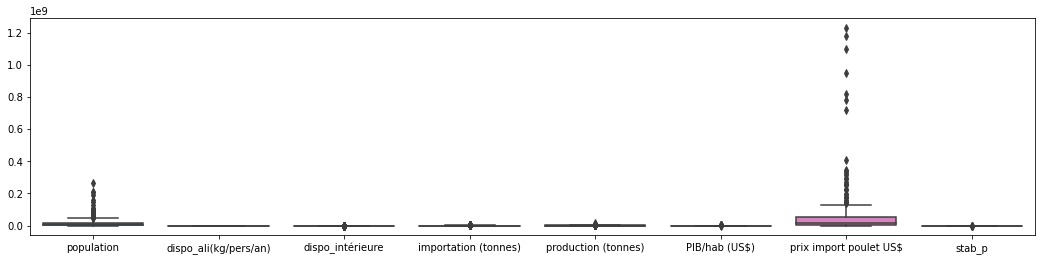

In [43]:
#Visualisation autres outliers
plt.figure(figsize = (18,4))
sns.boxplot(data = X)



# PS: On verra plus tard que la var 'prix import poulet US$' doit être supprimée

In [37]:
X.sort_values(by='population',ascending=False).head(7)

,population,dispo_ali(kg/pers/an),dispo_intérieure,importation (tonnes),production (tonnes),PIB/hab (US$),prix import poulet US$,stab_p
zone,,,,,,,,
"Chine, continentale","1,421,021,791.00",12.33,"18,161.00","452,000.00","18,236,000.00","12,952.10","1,027,766,000.00",-0.01
Inde,"1,338,676,785.00",2.22,"3,661.00",0.00,"3,545,000.00","6,182.90","76,000.00",-1.83
États-Unis d'Amérique,"325,084,756.00",55.68,"18,266.00","123,000.00","21,914,000.00","59,914.80","204,347,000.00",-1.79
Indonésie,"264,650,963.00",7.19,"2,323.00","1,000.00","2,301,000.00","10,935.60",0.00,-1.83
Pakistan,"207,906,209.00",5.86,"1,282.00","2,000.00","1,281,000.00","5,091.10","123,000.00",-2.41
Brésil,"207,833,823.00",48.03,"9,982.00","3,000.00","14,201,000.00","14,524.60","8,320,000.00",-1.83
Nigéria,"190,873,244.00",1.01,202.00,0.00,"201,000.00","5,190.40","20,650,000.00",-1.83


In [38]:
X.sort_values(by='prix import poulet US$',ascending=False).head(5)

,population,dispo_ali(kg/pers/an),dispo_intérieure,importation (tonnes),production (tonnes),PIB/hab (US$),prix import poulet US$,stab_p
zone,,,,,,,,
Japon,"127,502,725.00",18.50,"2,415.00","1,069,000.00","2,215,000.00","41,444.20","1,345,726,000.00",-0.15
Chine - RAS de Hong-Kong,"7,306,322.00",53.51,280.00,"907,000.00","24,000.00","59,842.20","1,296,629,000.00",-0.15
Arabie saoudite,"33,101,179.00",43.36,"1,435.00","722,000.00","616,000.00","47,306.20","1,232,031,000.00",-0.15
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,"66,727,461.00",31.94,"2,234.00","779,000.00","1,814,000.00","46,372.40","1,178,523,000.00",-0.15
Allemagne,"82,658,409.00",19.47,"1,739.00","842,000.00","1,514,000.00","53,071.50","1,101,592,000.00",-0.15


In [41]:
#On retire les outliers avec plus d'un milliard d'hab + quelques uns qu'on a pu constater lors de la projection des individus. On pourra si besoin les réutiliser plus tard pour voir si ça change l'analyse 
outlier = ['Chine, continentale', 'Inde', 'Chine - RAS de Hong-Kong', 'Japon', "États-Unis d'Amérique"]
X = X[~X.index.isin(outlier)]
print(len(X.index))

231


In [42]:
#Enregistrement du CSV nettoyé 
X.to_csv('df_final.csv', index=True)